In [1]:
# 📦 Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# 📥 1. Carregar os dados

colunas = ['usuario_id', 'filme_id', 'nota', 'timestamp']
df = pd.read_csv('ml-100k/u.item', sep='\t', names=colunas)  # ✅ OK
df.head()


,usuario_id,filme_id,nota,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


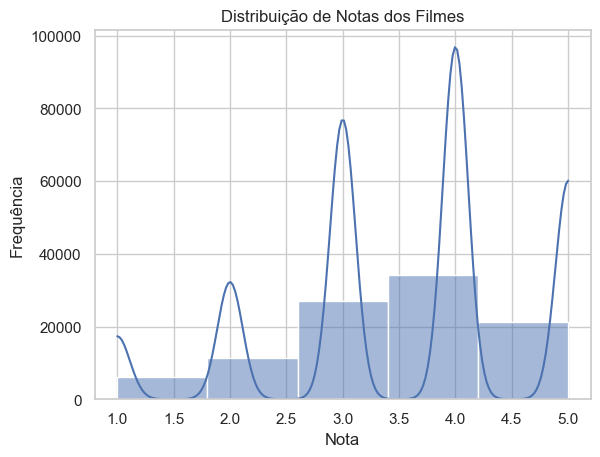

In [3]:
# 📊 2. Distribuição das notas dos filmes

sns.set(style="whitegrid")
sns.histplot(df['nota'], bins=5, kde=True)

plt.title('Distribuição de Notas dos Filmes')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()


In [4]:
# 🧾 3. Criar a matriz usuário-filme

matriz = df.pivot_table(index='usuario_id', columns='filme_id', values='nota')
matriz.fillna(0, inplace=True)
matriz.head()


filme_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
usuario_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 📈 4. Calcular similaridade entre usuários

similaridade = cosine_similarity(matriz)


In [15]:
# 🎯 5. Função de recomendação de filmes

def recomendar_filmes(usuario_id, n=5):
    sim_scores = list(enumerate(similaridade[usuario_id - 1]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    usuarios_similares = [i for i, _ in sim_scores[1:6]]

    recomendacoes = matriz.iloc[usuarios_similares].mean(axis=0)
    filmes_assistidos = matriz.iloc[usuario_id - 1]
    recomendacoes = recomendacoes[filmes_assistidos == 0]
    top_filmes = recomendacoes.sort_values(ascending=False).head(n)

    # Carregar nomes dos filmes
    filmes_df = pd.read_csv(
    'ml-100k/u.item',
    sep='|',
    encoding='latin-1',
    usecols=[0, 1],
    header=None,  # Arquivo não tem cabeçalho
    names=['filme_id', 'titulo']  # Apenas os nomes das colunas que você está lendo
)

    resultados = pd.DataFrame({
        'filme_id': top_filmes.index,
        'nota_prevista': top_filmes.values
    })

    resultados = resultados.merge(filmes_df, on='filme_id')
    return resultados[['titulo', 'nota_prevista']]


In [16]:
# 🧪 6. Testar a recomendação

print("Filmes recomendados para o usuário 1:")
recomendar_filmes(1)


Filmes recomendados para o usuário 1:


,titulo,nota_prevista
0,Heat (1995),4.0
1,Heathers (1989),4.0
2,Dr. Strangelove or: How I Learned to Stop Worr...,4.0
3,Clear and Present Danger (1994),3.6
4,Dave (1993),3.4
